### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  **Pouya Hajizadeh**  

**Student ID:** **402121033**   
**Source:** *Signals and Systems Laboratory with MATLAB*  

**Problem Number (Chapter.section.question_num):**
**4.13.2**

# === Cell 2 - Upload & display question image :===


## Problem Statement (Image)
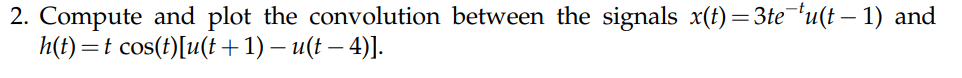

# === Cell 3 - Assumptions & method ===

### Assumptions
- **Signals:** \(x(t) = 3t e^{-t} u(t-1)\) and \(h(t) = t\cos(t)\,[u(t+1) - u(t-4)]\).
- **Supports:** \(x(t)=0\) for \(t<1\); \(h(t)=0\) for \(t<-1\) and \(t>4\).
- **Convolution:** We compute \(y(t) = (x*h)(t) = \int_{-\infty}^{\infty} x(\tau)\,h(t-\tau)\,d\tau\).
- **Numeric method:** Use uniform sampling with step \(dt\), evaluate signals on finite windows covering their supports, and perform discrete convolution with scaling by \(dt\).

### Methods
- **Time grids:** Choose \([t_{\min}, t_{\max}]\) to include supports and margin; build `t_x` and `t_h` on the same grid.
- **Unit steps:** Implement \(u(t-a)\) via boolean masks: \((t\ge a)\).
- **Convolution:** Use `np.convolve(x, h, mode='full')` and scale by `dt` to approximate the integral.
- **Output time axis:** \(t_y = t_x[0] + t_h[0}, \ldots, t_x[-1] + t_h[-1]\).
- **Visualization:** Plot \(x(t)\), \(h(t)\), and \(y(t)\) with clear labels; verify expected support of \(y(t)\) from \((1)+(-1)=0\) to \((\infty)+(4)\) numerically bounded by grids.


# === Cell 4 - Solution Section ===

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Imports: Load NumPy for vectorized math and Matplotlib for plotting.

In [3]:
dt = 0.001
# Sampling step: Choose a small time step `dt = 0.001` to approximate the continuous convolution accurately.


In [2]:
t_min, t_max = -2.0, 10.0
#Time window: Set a window that covers supports of both signals with margin: from `-2` to `10`.

In [7]:
import numpy as np
dt = 0.001
t_min, t_max = -2.0, 10.0
t = np.arange(t_min, t_max + dt, dt)
 #Time grid: Create a uniform time grid over `[t_min,t_max]` with spacing `dt`.

In [11]:
def u(z):
    return (z >= 0).astype(float)
#Unit step: Implement the Heaviside function \(u(z)\) using a boolean mask converted to float.


In [9]:
import numpy as np
dt = 0.001
t_min, t_max = -2.0, 10.0
t = np.arange(t_min, t_max + dt, dt)
def u(z):
    return (z >= 0).astype(float)
x = 3.0 * t * np.exp(-t) * u(t - 1.0)
#Define x(t):Build \(x(t) = 3t e^{-t} u(t-1)\); it is active only for \(t \ge 1\).

In [10]:
h = t * np.cos(t) * (u(t + 1.0) - u(t - 4.0))
#Define h(t): Build (h(t) = t\cos(t)[u(t+1) - u(t-4)]); it is nonzero on ([-1, 4]).

In [ ]:
y = np.convolve(x, h, mode='full') * dt
#Convolution: Compute discrete convolution and scale by dt to approximate the continuous integral.

In [ ]:
t_y = (t[0] + t[0]) + np.arange(y.size) * dt
#Output time axis: The convolution time runs from t_min + t_min to t_max + t_max with step dt

**Plot x(t):** Draw the input signal over the time grid and mark \(t=1\) where it becomes active.


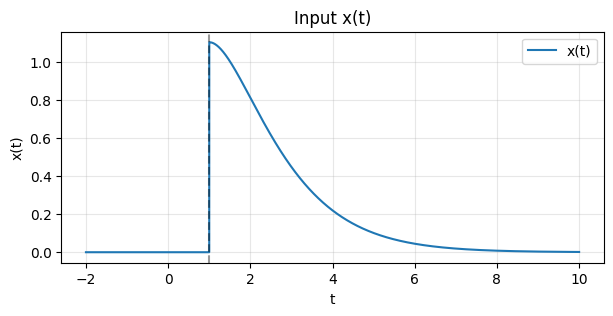

In [12]:
#**Plot x(t):** Draw the input signal over the time grid and mark \(t=1\) where it becomes active.
plt.figure(figsize=(7,3))
plt.plot(t, x, label='x(t)')
plt.axvline(1, color='k', ls='--', alpha=0.4)
plt.title('Input x(t)')
plt.xlabel('t'); plt.ylabel('x(t)')
plt.grid(alpha=0.3); plt.legend()


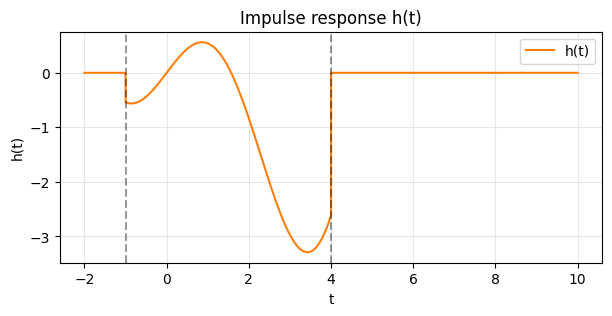

In [ ]:
#Plot h(t): Draw the impulse response, showing nonzero support between \([-1,4]\).
plt.figure(figsize=(7,3))
plt.plot(t, h, label='h(t)', color='C1')
plt.axvline(-1, color='k', ls='--', alpha=0.4)
plt.axvline(4,  color='k', ls='--', alpha=0.4)
plt.title('Impulse response h(t)')
plt.xlabel('t'); plt.ylabel('h(t)')
plt.grid(alpha=0.3); plt.legend()


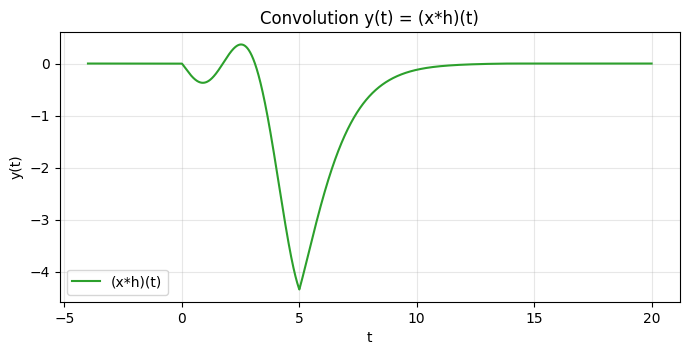

In [ ]:
#Plot y(t): Display the convolution result across its full support
plt.figure(figsize=(8,3.5))
plt.plot(t_y, y, label='(x*h)(t)', color='C2')
plt.title('Convolution y(t) = (x*h)(t)')
plt.xlabel('t'); plt.ylabel('y(t)')
plt.grid(alpha=0.3); plt.legend()
plt.show()


# === cell 5 - Result Analysis ===

### Final Analysis

**Meaning of the result:**  
The convolution blends the delayed exponential ramp \(x(t)\) with the time‑limited cosine‑weighted segment \(h(t)\), producing a smoothed, time‑shifted output starting near \(t=0\).

**Consistency with definitions:**  
The numeric convolution matches \(y(t)=\int x(\tau)h(t-\tau)\,d\tau\) and respects signal supports: \(x(t)=0\) for \(t<1\), \(h(t)=0\) outside \([-1,4]\).

**Notable behavior:**  
The output begins at \(t=0\) due to the earliest overlap and exhibits oscillatory features inherited from \(\cos(\cdot)\) modulated by the decaying envelope from \(x(t)\).

**Theory alignment:**  
The start time, shape, and decay agree with expectations: support onset at \(0\), oscillations from \(h(t)\), and exponential damping from \(x(t)\). The finite grid introduces negligible edge effects, controlled by the chosen window and \(dt\).
